# V233. Fourieroptik

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('classic')

## 3.1 Quantitative Beobachtungen am Einzelspalt

### Eichung der Abzisse

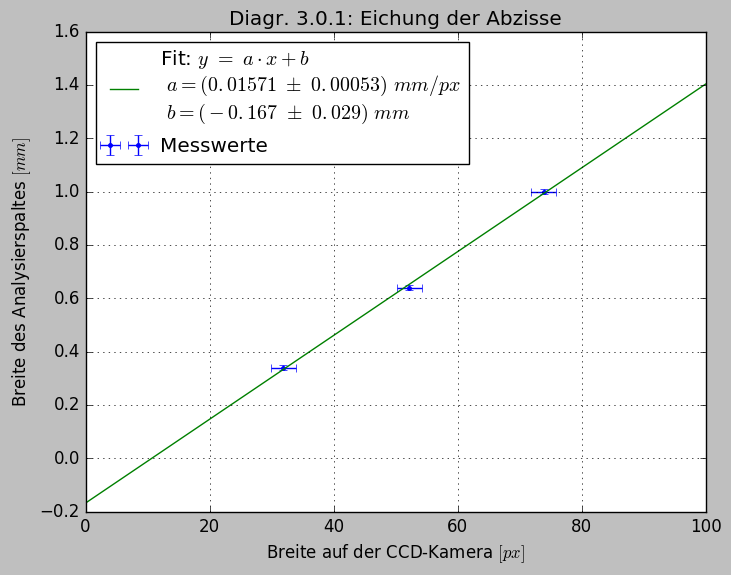

In [23]:
#Messdaten

B_A = 2*np.array([0.17, 0.32, 0.50]) #Breite des Analysierspaltes [mm]
dB_A = 0.01 #Fehler
B_K = np.array([31.86, 52.20, 73.90]) #Breite auf CCD-Kamera [px]
dB_K = 2 #Fehlder


#Fitfunktion

def lin(x, a, b):
    return a*x + b

popt_E, pcov_E = curve_fit(lin, B_K, B_A)

a_E = popt_E[0]
da_E = np.sqrt(pcov_E[0,0])
b_E = popt_E[1]
db_E = np.sqrt(pcov_E[1,1])
y1 = np.linspace(0, 100)

#Plot

plt.errorbar(B_K, B_A, yerr = dB_A, xerr = dB_K, fmt = '.', label = 'Messwerte')
plt.plot(y1, lin(y1, *popt_E), label = 'Fit: $y \ = \ a\cdot x+b$ \n $a = ({:.5f}\ \pm \ {:.5f})\ mm/px$ \n $b = ({:.3f}\ \pm \ {:.3f})\ mm$' .format(a_E, da_E, b_E, db_E))

plt.title('Diagr. 3.0.1: Eichung der Abzisse') 
plt.xlabel('Breite auf der CCD-Kamera $[px]$')
plt.ylabel('Breite des Analysierspaltes $[mm]$')
plt.legend(loc = 'upper left')
plt.grid()

plt.savefig('V233_Diagr.311.jpg', format = 'jpg')

## Lage der Maxima und Minima

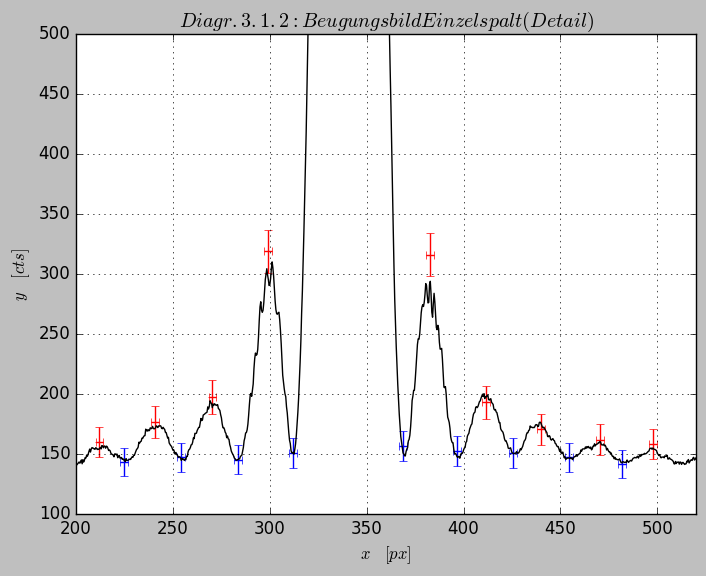

In [24]:
#Messdaten
x, I = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.1/V233/Data/JanStef Einzelspalt.dat', skiprows=1, unpack = True)

x0 = 341.21 #Lage Hauptmaximum [px]
xmax_l = np.array([182.56, 212.06, 240.86, 270.36, 298.86]) #Lage d. Maxima links [px]
xmax_r = np.array([382.57, 411.4, 439.97, 470.54, 497.93]) #Lage d. Maxima rechts [px]
xmin_l = np.array([198.01, 224.7, 254.2, 283.71, 311.80]) #Lage d. Minima links [px]
xmin_r = np.array([368.69, 396.79, 425.59, 454.39, 481.78]) #Lage d. Minima rechts [px]
dx = 2

I_min = np.array([139.48,143.22,146.95,145.08,150.69,156.29,152.55,150.69,146.95,141.35])
I_max = np.array([156.29,160.02,176.83,197.38,318.77,315.83,192.82,170.41,161.85,158.16])

x_min = np.append(xmin_l, xmin_r) - x0
x_max = np.append(xmax_l, xmax_r) - x0
n_min = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]) #Ordung der Minima

plt.errorbar(x_min+x0, I_min, xerr= 2, yerr=np.sqrt(I_min), ls='none', marker = '+', color = 'b')
plt.errorbar(x_max+x0, I_max, xerr=2, yerr=np.sqrt(I_max), ls='none', marker = '+', color = 'r')
plt.plot(x, I, color = 'black', linewidth = 1)
plt.xlabel('$x \quad [px]$')
plt.ylabel('$y \quad [cts]$')
plt.xlim([200,520])
plt.ylim([100,500])
plt.title('$Diagr. 3.1.2: Beugungsbild Einzelspalt (Detail)$')
plt.grid()
plt.savefig('Diagr.312.pdf', format = 'pdf', dpi = 600)

###  Fit der Abstände von Maxima und Minima

n(-5. Maximum) = -5.52 +/- 0.07
n(-4. Maximum) = -4.49 +/- 0.07
n(-3. Maximum) = -3.48 +/- 0.07
n(-2. Maximum) = -2.44 +/- 0.07
n(-1. Maximum) = -1.44 +/- 0.07
n(+1. Maximum) = +1.49 +/- 0.07
n(+2. Maximum) = +2.51 +/- 0.07
n(+3. Maximum) = +3.51 +/- 0.07
n(+4. Maximum) = +4.58 +/- 0.07
n(+5. Maximum) = +5.54 +/- 0.07


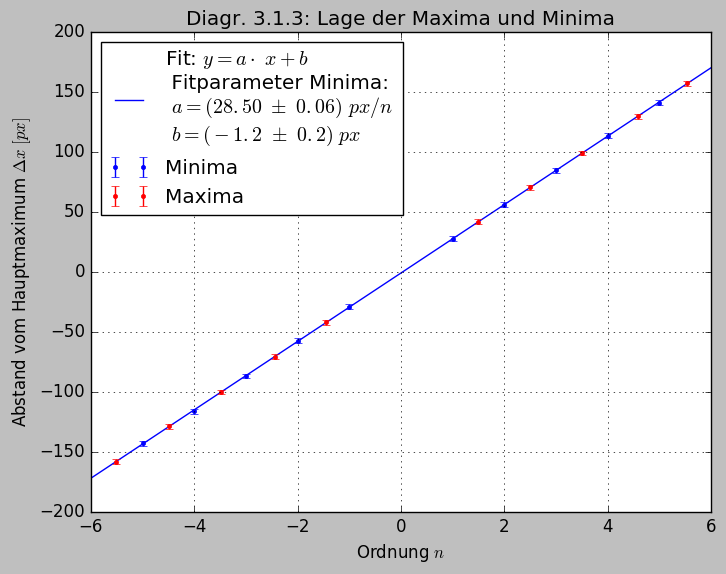

In [25]:
#Minima

popt1, pcov1 = curve_fit(lin, n_min, x_min)

a1 = popt1[0]
da1 = np.sqrt(pcov1[0,0])
b1 = popt1[1]
db1 = np.sqrt(pcov1[1,1])


#Ordnung der Maxima

n_max = (x_max - b1)/a1
dn_max = np.sqrt(((dx/a1)**2 + (db1/a1)**2) + (((x_max - b1)*da1)/a1**2)**2)

for i in range(0, 10):
    print('n({0:+1}. Maximum) = {1:+1.2f} +/- {2:1.1}' .format(n_min[i], n_max[i], dn_max[i]))


#Plotten

y2 = np.linspace(-6, 6)
plt.errorbar(n_min, x_min, yerr = dx, fmt = '.', label = 'Minima')
plt.plot(y2, lin(y2, *popt1), color = 'b', label = 'Fit: $y = a\cdot \ x+b $ \n Fitparameter Minima: \n $a = ({:.2f} \ \pm \ {:.2f}) \ px/n$ \n $ b = ({:.1f} \ \pm \ {:.1f})\ px$' .format(a1, da1, b1, db1))
plt.errorbar(n_max, x_max, yerr = dx, fmt = '.', label = 'Maxima', color = 'r')

plt.title('Diagr. 3.1.3: Lage der Maxima und Minima')
plt.xlabel('Ordnung $n$')
plt.ylabel('Abstand vom Hauptmaximum $\Delta x\ [px]$')
plt.legend(loc = 'upper left')
plt.grid()

plt.savefig('V233_Diagr.313.jpg', format = 'jpg')

### Spaltweite

In [26]:
#a1 = 44
f_L1 = 80 #[mm]
df_L1 = 0.01*f_L1
λ = 635e-6 #Wellenlänge [mm]

d = f_L1*λ/(a1*a_E*0.5)
dd = d*np.sqrt((df_L1/f_L1)**2 + (da_E/a_E)**2 + (da1/a1)**2)

print('Spaltweite: d = ({:.6f} +/- {:.6f}) mm' .format(d*1, dd))

Spaltweite: d = (0.226943 +/- 0.008009) mm


### Intensität

In [27]:
#Untergrund

Ug = 142 #Untergrund starke Messung links [cts]
dUg = np.sqrt(Ug) #Fehler der Intensität [cts]

#Intensitäten (Umgerechnet)

I0 = 3985.74 - 142 #Intesität Hauptmaximum 
dI0 = np.sqrt(3985.74 + Ug)

I_max_corr = I_max - Ug #Nebenmaxima
dI_max_corr = np.sqrt(I_max + Ug)


#Verhältnisse

V_exp = (I_max_corr/I0) #Experimentell
dV_exp = V_exp*np.sqrt((1/I0) + (1/I_max_corr))

N = np.array([-5.5, -4.5, -3.5, -2.5, -1.5, 1.5, 2.5,3.5, 4.5, 5.5])
V_th = ((np.sin(np.pi*N)/(np.pi*N))**2)*100

#Ergebnis

for i in range (0,5):
    print('Verhältnis {:+}. Maximum zum Hauptmaximum: ({:.2f} +/- {:.2f}) %; theoretischer Wert: {:.2f}%' .format(i-5, V_exp[i]*100, dV_exp[i]*100, V_th[i]))

for i in range (0,5):
    print('Verhältnis {:+}. Maximum zum Hauptmaximum: ({:.2f} +/- {:.2f}) %; theoretischer Wert: {:.2f}%' .format(i+1, V_exp[i+5]*100, dV_exp[i+5]*100, V_th[i+5]))
    

Verhältnis -5. Maximum zum Hauptmaximum: (0.37 +/- 0.10) %; theoretischer Wert: 0.33%
Verhältnis -4. Maximum zum Hauptmaximum: (0.47 +/- 0.11) %; theoretischer Wert: 0.50%
Verhältnis -3. Maximum zum Hauptmaximum: (0.91 +/- 0.15) %; theoretischer Wert: 0.83%
Verhältnis -2. Maximum zum Hauptmaximum: (1.44 +/- 0.19) %; theoretischer Wert: 1.62%
Verhältnis -1. Maximum zum Hauptmaximum: (4.60 +/- 0.35) %; theoretischer Wert: 4.50%
Verhältnis +1. Maximum zum Hauptmaximum: (4.52 +/- 0.35) %; theoretischer Wert: 4.50%
Verhältnis +2. Maximum zum Hauptmaximum: (1.32 +/- 0.19) %; theoretischer Wert: 1.62%
Verhältnis +3. Maximum zum Hauptmaximum: (0.74 +/- 0.14) %; theoretischer Wert: 0.83%
Verhältnis +4. Maximum zum Hauptmaximum: (0.52 +/- 0.12) %; theoretischer Wert: 0.50%
Verhältnis +5. Maximum zum Hauptmaximum: (0.42 +/- 0.10) %; theoretischer Wert: 0.33%


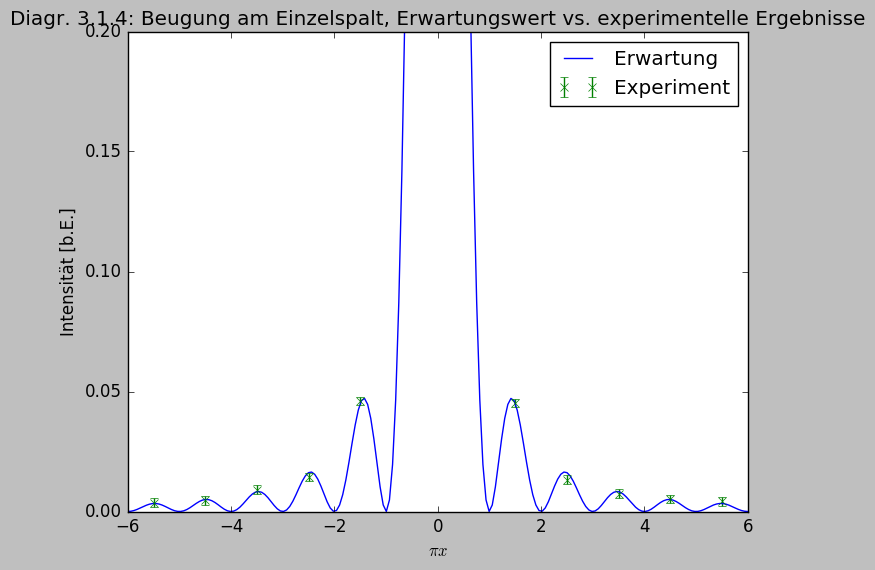

In [28]:
#Graphische Dartstellung

def spalt(x):
    return np.sinc(x)**2
    
x_th = np.linspace(-6, 6, 200)

plt.plot(x_th, spalt(x_th), label = 'Erwartung')
plt.errorbar(N, V_exp, yerr = np.mean(dV_exp), fmt = 'x', label = 'Experiment')

plt.title('Diagr. 3.1.4: Beugung am Einzelspalt, Erwartungswert vs. experimentelle Ergebnisse')
plt.xlabel('$\pi x$')
plt.ylim([0, 0.2])
plt.ylabel('Intensität [b.E.]')
plt.legend(loc='best')

plt.savefig('V233_Diagr.314.jpg', format = 'jpg')

## 3.2 Beugungsstruktur des Doppelspaltes

In [29]:
#Bestimmung der Spaltbreite

f_L1 = 80e-3 #Brennweite[m]
b = 67.5e-2 #Bildweite[m]
db = 5e-3 #[m]

d_l = 42.42 #Breite Spaltbild links [px]
d_r = 41.87 #Breite Spaltbild rechts [px]
dd_lr = 3 #Fehler

g4 = 2*58.66 #Spaltabstand [px]
dg4 = 3 #[px]

g = (1/f_L1 - 1/b)**(-1)
dg = (f_L1**2)*db/((f_L1 - b)**2)

B4 = np.array([d_r, d_l, g4])
dB4 = np.array([dd_lr, dd_lr, dg4])
G4 = g*B4/b
dG4 = G4*np.sqrt((dg/g)**2 + ((dB4/B4)**2) + (db/b)**2)

G4_m = G4*14e-6
dG4_m = dG4*14e-6

mSb = (G4_m[0] + G4_m[1])/2 #Mittlere Spaltbreite
dmSb = 0.5*np.sqrt((dG4_m[0])**2 + (dG4_m[1])**2)

print('Gegenstandsweite: g = ({:.2f} +/- {:.2f}) cm' .format(g*10**2, dg*10**2))
print('mittlere Spaltbreite: <d>  = ({:.2f} +/- {:.2f}) μm' .format(mSb*10**6, 2*dmSb*10**6))
print('Spaltabstand: g = ({:.2f} +/- {:.2f}) μm ' .format(G4_m[2]*10**6, 2*dG4_m[2]*10**6))

Gegenstandsweite: g = (9.08 +/- 0.01) cm
mittlere Spaltbreite: <d>  = (79.33 +/- 8.03) μm
Spaltabstand: g = (220.84 +/- 11.77) μm 


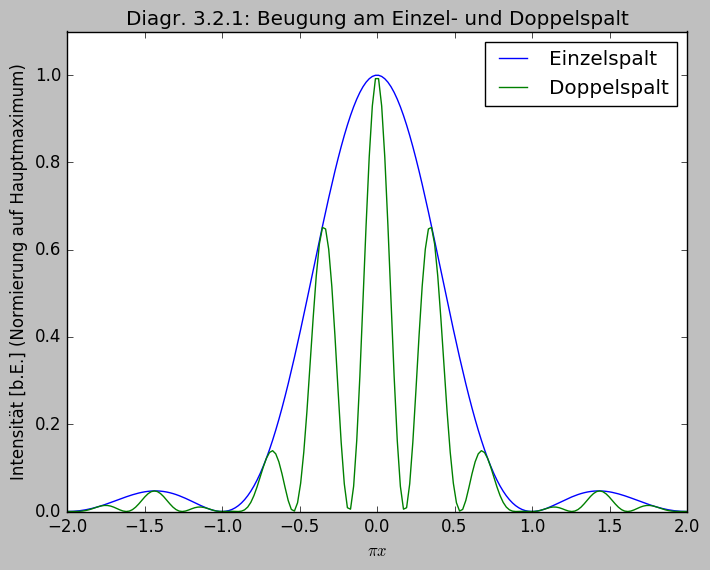

In [30]:
#Theoretische Erwartung (beide)

def beugung_spalt(x):
    return np.sinc(x)**2

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(v*np.pi*x)**2

a = 1
v = (G4_m[2]/mSb)
x = np.linspace(-(a + 1), a + 1, 200)

plt.plot(x, beugung_spalt(x), label = 'Einzelspalt')
plt.plot(x, beugung_doppelspalt(x), label = 'Doppelspalt')
plt.xlabel('$\pi x$')
plt.ylabel('Intensität [b.E.] (Normierung auf Hauptmaximum)')
plt.title('Diagr. 3.2.1: Beugung am Einzel- und Doppelspalt')
plt.ylim([0,1.1])
plt.legend()

plt.savefig('V233_Diagr.321.jpg', format = 'jpg')

In [31]:
#Vergeleich der Intensität zum 1. Nebenmaximum

Ug = 121.97 #Untergrund Doppelspalt
dUg = np.sqrt(Ug)

ID0_raw = 3112.45
ID0 = ID0_raw - Ug #Intensität Hauptmaximum Doppelspalt, Untergrund abgezogen
dID0 = np.sqrt(1/ID0 + 1/Ug) 

Il = np.array([211.34, 226.76, 275.22, 1792.99]) - Ug #Intensitäten Maxima links, Untergrund abgezogen [cnt] (Umgehe Teilen durch 0)
Ir = np.array([1807.57, 270.87, 251.09, 208.69]) - Ug #Intensitäten Maxima rechts, Untergrund abgezogen [cnt](Umgehe Teilen durch 0)
dIl = np.sqrt(1/Il + 1/Ug)
dIr = np.sqrt(1/Ir + 1/Ug)

VDl = Il/ID0 #Verhältnis Doppelspalt
dVDl = VDl*np.sqrt(1/Il + 1/ID0)
VDr = Ir/ID0  
dVDr = VDr*np.sqrt(1/Ir + 1/ID0)

N2 = np.array([0.35, 0.67, 1.15, 1.43])

th_I = np.sinc(N2)**2 * np.cos(np.pi*v*N2)**2 *100

for i in range(4):
    print('Verhältnis {0:+1}. Nebenmaximum zum Hauptmaximum: ({1:1.3f} +/- {2:1.3})%; theoret. Wert: {3:3.2f}%' .format(i-4, VDl[i]*100, dVDl[i]*100, th_I[3-i]))
    
for i in range(4):
    print('Verhältnis {0:+1}. Nebenmaximum zum Hauptmaximum: ({1:1.3f} +/- {2:1.3})%; theoret. Wert: {3:3.2f}%' .format(i+1, VDr[i]*100, dVDr[i]*100, th_I[i]))    

Verhältnis -4. Nebenmaximum zum Hauptmaximum: (2.988 +/- 0.321)%; theoret. Wert: 4.70%
Verhältnis -3. Nebenmaximum zum Hauptmaximum: (3.504 +/- 0.348)%; theoret. Wert: 1.03%
Verhältnis -2. Nebenmaximum zum Hauptmaximum: (5.125 +/- 0.424)%; theoret. Wert: 13.89%
Verhältnis -1. Nebenmaximum zum Hauptmaximum: (55.878 +/- 1.71)%; theoret. Wert: 65.24%
Verhältnis +1. Nebenmaximum zum Hauptmaximum: (56.366 +/- 1.72)%; theoret. Wert: 65.24%
Verhältnis +2. Nebenmaximum zum Hauptmaximum: (4.979 +/- 0.418)%; theoret. Wert: 13.89%
Verhältnis +3. Nebenmaximum zum Hauptmaximum: (4.318 +/- 0.388)%; theoret. Wert: 1.03%
Verhältnis +4. Nebenmaximum zum Hauptmaximum: (2.900 +/- 0.316)%; theoret. Wert: 4.70%


In [32]:
d4 = np.array([G4_m[0], G4_m[1]])
d4_mean = np.mean(d4)

vG = G4_m[2]/d4_mean
dv = np.sqrt(((dG4_m[2]/G4_m[2])**2) + ((np.sqrt(((G4_m[0])**2) + ((dG4_m[1])**2))*0.5)/d4_mean)**2)

print('Verhältnis Spaltabstand zu Spaltbreite: v = ({:.2f} +/- {:.2f})' .format(vG, dv))

Verhältnis Spaltabstand zu Spaltbreite: v = (2.78 +/- 0.50)


## 3.3 Fouriersynthese des Einzelspalts

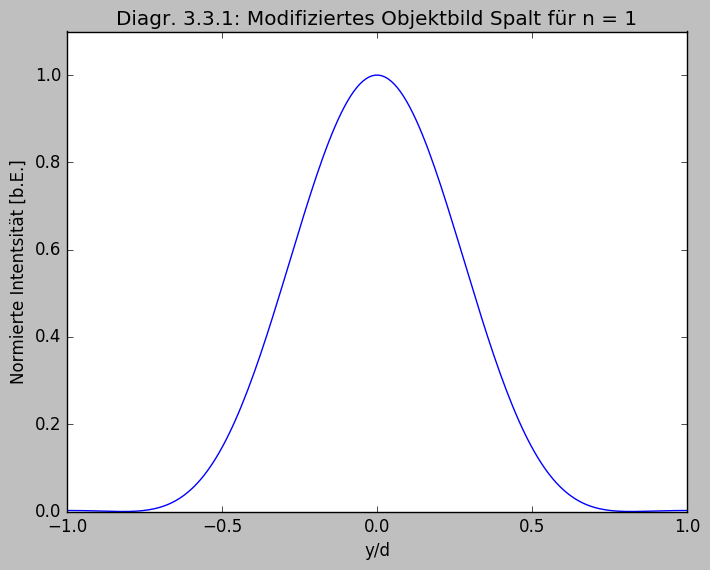

In [33]:
#Modifizierte Spaltbilder

#Einfachspalt

#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

d = 1
n = 1

Y = np.linspace(-1,1, 200)*d

#Berechnung des resultierenden Objektbilds

from scipy.integrate import quad
f_mod = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_mod.append(result**2)

#Normierung der Kurve auf 1
f_mod = f_mod/np.max(f_mod)

plt.plot(Y, f_mod)
plt.xlabel('y/d')
plt.ylabel('Normierte Intentsität [b.E.]')
plt.ylim(0, 1.1)
plt.title('Diagr. 3.3.1: Modifiziertes Objektbild Spalt für n = 1')
plt.savefig('V233_Diagr.331.jpg', format = 'jpg')

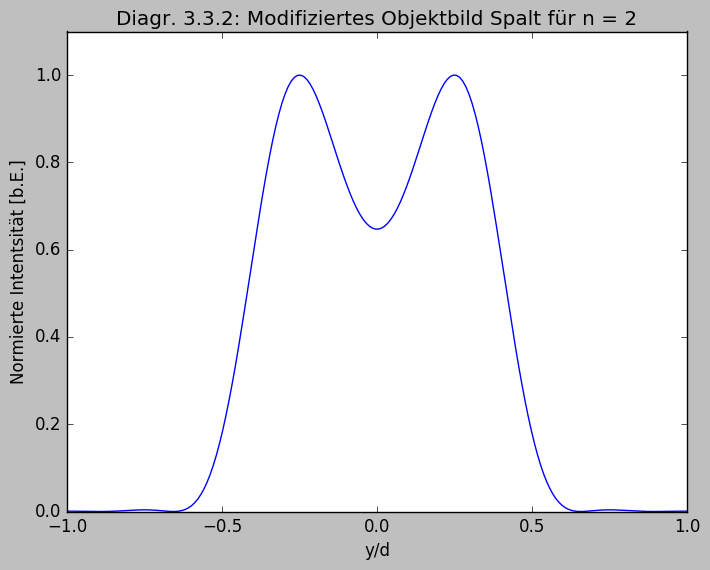

In [34]:
#Modifizierte Spaltbilder

#Einfachspalt

#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

d = 1
n = 2
Y = np.linspace(-1,1, 200)*d

#Berechnung des resultierenden Objektbilds

from scipy.integrate import quad
f_mod = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_mod.append(result**2)

#Normierung der Kurve auf 1
f_mod = f_mod/np.max(f_mod)

plt.plot(Y, f_mod)
plt.xlabel('y/d')
plt.ylabel('Normierte Intentsität [b.E.]')
plt.ylim(0, 1.1)
plt.title('Diagr. 3.3.2: Modifiziertes Objektbild Spalt für n = 2')
plt.savefig('V233_Diagr.332.jpg', format = 'jpg')

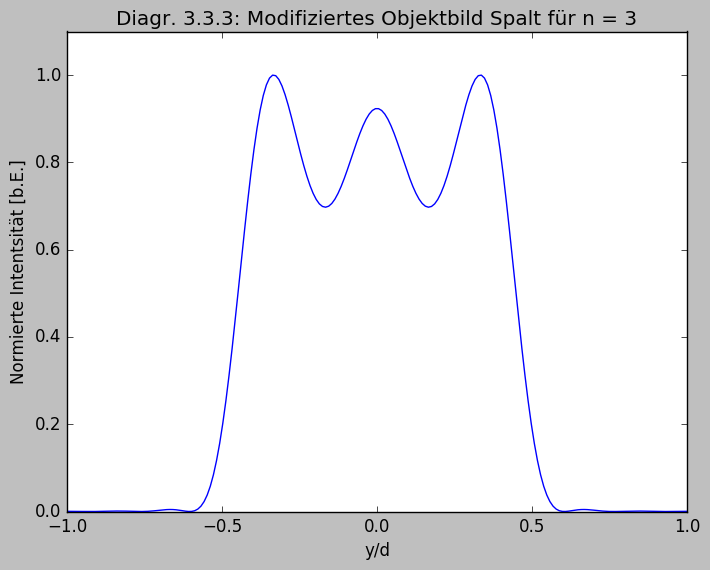

In [35]:
#Modifizierte Spaltbilder

#Einfachspalt

#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

d = 1
n = 3

Y = np.linspace(-1,1, 200)*d

#Berechnung des resultierenden Objektbilds

from scipy.integrate import quad
f_mod = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_mod.append(result**2)

#Normierung der Kurve auf 1
f_mod = f_mod/np.max(f_mod)

plt.plot(Y, f_mod)
plt.xlabel('y/d')
plt.ylabel('Normierte Intentsität [b.E.]')
plt.ylim(0, 1.1)
plt.title('Diagr. 3.3.3: Modifiziertes Objektbild Spalt für n = 3')
plt.savefig('V233_Diagr.331.jpg', format = 'jpg')

In [37]:
#Intensitäten der Maxima bei 1,2,3 Wiggels
#Untergrund

U = 119
dU = np.sqrt(U)

#1 Wiggel
I1 = 2582 - U
dI1 = np.sqrt(2582 + U)

#2 Wiggel
I2r = np.array([2495, 2448])
I2 = I2r - U
dI2 = np.sqrt(I2r + U)

#3 Wiggel
I3r = np.array([2437, 2194, 2300])
I3 = I3r - U
dI3 = np.sqrt(I3r + U)

In [38]:
#Verhältnis 1 
V3 = (I2/I1)*100
dV3 = np.sqrt(((dI2/I2)**2 + ((dI1/I1)**2)))*V3
print('1. zugelassene Beugungsordnung:')

for i in range (0,2):
    print('Verhältnis {}. Maximum zur 0. Beugungsordnung: ({:2.2f} +/- {:1.2f})%' .format(i+1, V3[i], dV3[i]))
    
#Verhältnis 2
V4 = (I3/I1)*100
dV4 = np.sqrt((dI3/I3)**2 + (dI1/I1)**2)*V4

print('2. Zugelassene Beugunsordnung: ')
for i in range (0,3):
    print('Verhältnis {}. Maximum zur 0. Beugunsordnung: ({:2.2f} +/- {:1.2f})%' .format(i+1, V4[i], dV4[i]))

1. zugelassene Beugungsordnung:
Verhältnis 1. Maximum zur 0. Beugungsordnung: (96.47 +/- 2.91)%
Verhältnis 2. Maximum zur 0. Beugungsordnung: (94.56 +/- 2.87)%
2. Zugelassene Beugunsordnung: 
Verhältnis 1. Maximum zur 0. Beugunsordnung: (94.11 +/- 2.86)%
Verhältnis 2. Maximum zur 0. Beugunsordnung: (84.25 +/- 2.64)%
Verhältnis 3. Maximum zur 0. Beugunsordnung: (88.55 +/- 2.73)%


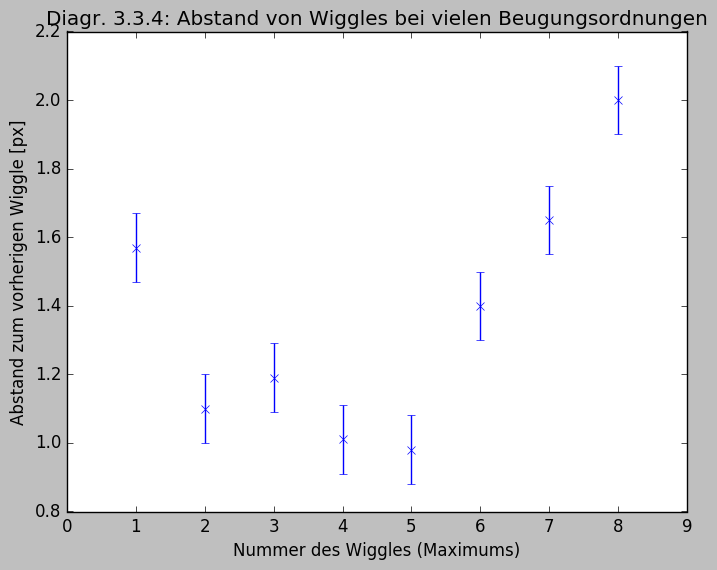

In [39]:
# Abstände der Maxima bei einer großen Anzahl von Wiggels

wiggle = np.linspace(1,8,8)
x_w = np.array([1.57, 1.10, 1.19, 1.01, 0.98, 1.40, 1.65, 2.00])
dx_w = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

plt.errorbar(wiggle, x_w, yerr = dx_w, marker='x', ls='none')
plt.xlabel('Nummer des Wiggles (Maximums)')
plt.ylabel('Abstand zum vorherigen Wiggle [px]')
plt.xlim(0,9)
plt.title('Diagr. 3.3.4: Abstand von Wiggles bei vielen Beugungsordnungen')
plt.savefig('V233_Diagr.334.jpg', format = 'jpg')

## 3.4 Fourierbild des Doppelspaltes

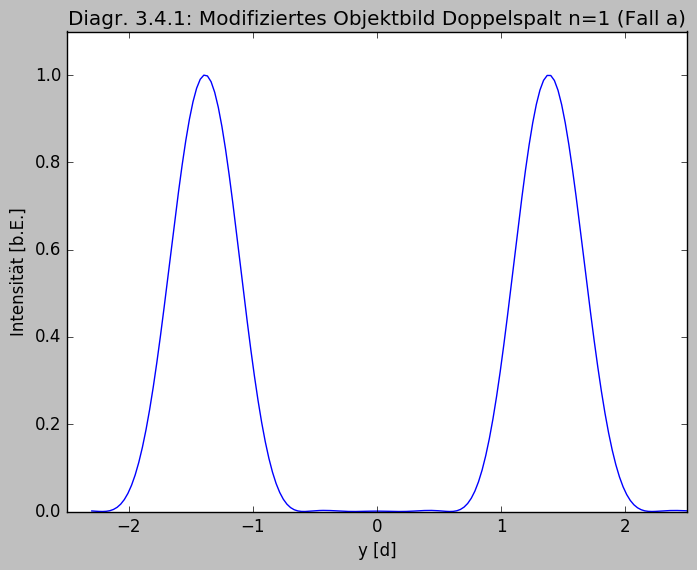

In [40]:
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

g = v*d
n = 1
Yd = np.linspace(-2.3, 3.5, 200)*d

#Berechnung des resultierenden Objektbilds

f_mod_d = []

for i in range(len(Y)):
    y = Yd[i]
    result, err = quad(doppelspalt, 0, 2*np.pi*n/d)
    f_mod_d.append(result**2)
    
    
#Normierung der Kurve auf 1

f_mod_d = f_mod_d/np.max(f_mod_d)

plt.plot(Yd, f_mod_d)
plt.xlabel('y [d]')
plt.ylabel('Intensität [b.E.]')
plt.title('Diagr. 3.4.1: Modifiziertes Objektbild Doppelspalt n=1 (Fall a)')
plt.ylim(0, 1.1)
plt.xlim(-2.5, 2.5)

plt.savefig('V233_Diagr.341.jpg', format = 'jpg')

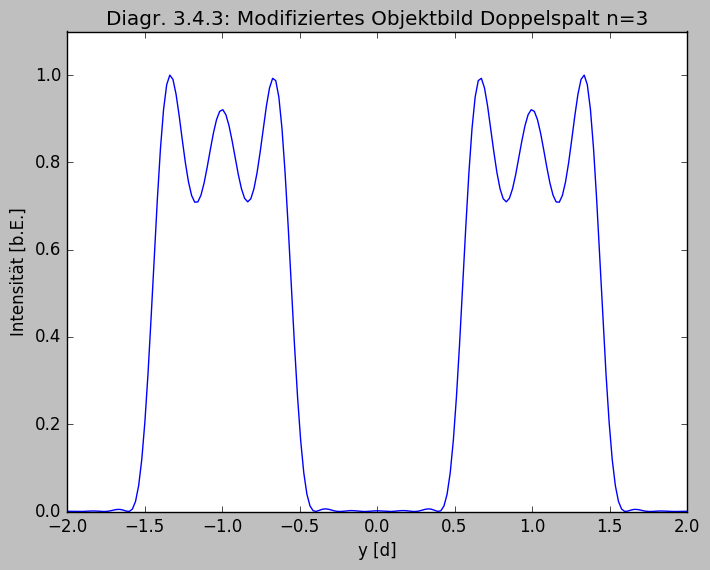

In [41]:
n=3
g=2*d
Yd = np.linspace(-2, 2, 200)*d

#Berechnung des resultierenden Objektbilds

f_mod_d = []

for i in range(len(Y)):
    y = Yd[i]
    result, err = quad(doppelspalt, 0, 2*np.pi*n/d)
    f_mod_d.append(result**2)
    
    
#Normierung der Kurve auf 1

f_mod_d = f_mod_d/np.max(f_mod_d)

plt.plot(Yd, f_mod_d)
plt.xlabel('y [d]')
plt.ylim(0,1.1)
plt.ylabel('Intensität [b.E.]')
plt.title('Diagr. 3.4.3: Modifiziertes Objektbild Doppelspalt n=3')

plt.savefig('V233_Diagr.343.jpg', format = 'jpg')

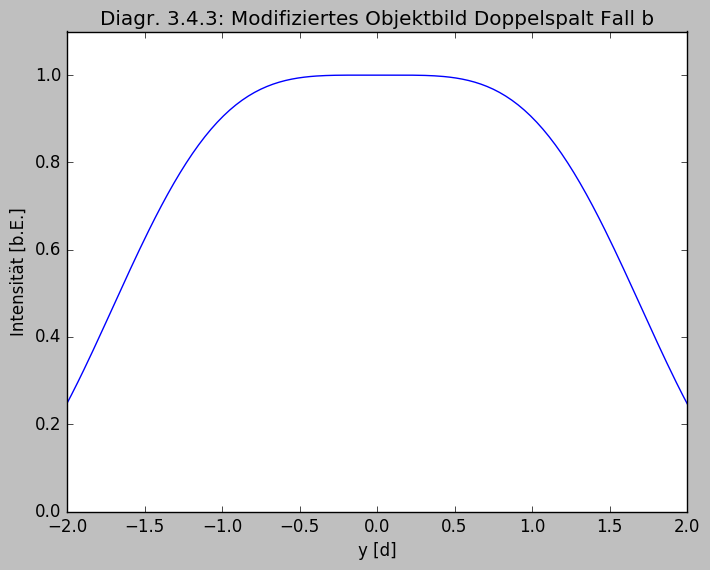

In [42]:
n=0.336
g=2*d
Yd = np.linspace(-20, 20, 2000)*d

#Berechnung des resultierenden Objektbilds

f_mod_d = []

for i in range(len(Yd)):
    y = Yd[i]
    result1, err = quad(doppelspalt, 0, 2*np.pi*n/d)
    f_mod_d.append(result1**2)
    
    
#Normierung der Kurve auf 1

f_mod_d = f_mod_d/np.max(f_mod_d)

plt.plot(Yd, f_mod_d)
plt.xlabel('y [d]')
plt.ylim(0,1.1)
plt.xlim(-2,2)
plt.ylabel('Intensität [b.E.]')
plt.title('Diagr. 3.4.3: Modifiziertes Objektbild Doppelspalt Fall b')

plt.savefig('V233_Diagr.343.jpg', format = 'jpg')

In [43]:
#Experimenteller Wert von k_y
n_ex = 0.336
dn_ex = 0.001
dist = 57.1e-2
ddist = 1e-2
g = (1/f_L1 - 1/dist)**(-1)
abb = g / dist

b = 2*0.0171 #Spaltbreite
db = 0.002
L1 = 80 #[mm]
λ = 635e-9

dabb = g*ddist/(dist**2)

k_y_th = 2*n_ex*np.pi/(b*abb) 
dk_y_th = k_y_th*np.sqrt((dn_ex/n_ex)**2 + (db/b)**2 + (dabb/abb)**2)

k_y = np.pi/λ*b/L1
dk_y = k_y*db/b

print('Theoretischer Wert von k_y = {:.0f} +/- {:.0f}' .format(k_y_th*2*np.pi, dk_y_th*2*np.pi))
print('Experimenteller Wert von k_y = {:.0f} +/- {:.0f}' .format(k_y, dk_y))

Theoretischer Wert von k_y = 2380 +/- 145
Experimenteller Wert von k_y = 2115 +/- 124
